In [44]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import cm
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# **Introduction**

Murder is the top most category of crime in India. Currently India's homicide rate is 3.08 per 100,000 population. The objective of this notebook is to see the trend of murder victims  over the years as well as murder victims per state. first lets see the data.

In [45]:
df = pd.read_csv("./32_Murder_victim_age_sex.csv")
df.Year.unique()
df.Area_Name.unique()
df.Sub_Group_Name.unique()
df.head(10)


,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
5,Chandigarh,2001,Murder - Female Victims,2. Female Victims,3.0,5,0.0,0.0,0.0,1.0,1.0
6,Chhattisgarh,2001,Murder - Female Victims,2. Female Victims,63.0,549,14.0,38.0,38.0,214.0,182.0
7,Delhi,2001,Murder - Female Victims,2. Female Victims,14.0,152,2.0,12.0,9.0,74.0,41.0
8,Goa,2001,Murder - Female Victims,2. Female Victims,1.0,13,NaN,NaN,NaN,4.0,8.0
9,Gujarat,2001,Murder - Female Victims,2. Female Victims,26.0,363,9.0,57.0,8.0,132.0,131.0


This dataset contains Victim's information from year 2001 to 2010 and 35 states & Union territories. The age group is divided into 6 categories.
* less than 10 year old victims
* 10-15 year old victims
* 15-18 year old victims
* 18-30 year old victims
* 30-50 year old victims
* 50 + older victims

In [46]:
df.describe()

,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
count,1018.000000,962.000000,1018.000000,876.000000,900.000000,888.000000,1009.000000,1007.000000
mean,2005.512770,67.559252,683.406680,9.536530,14.726667,17.326577,314.739346,274.230387
std,2.866127,100.650347,1015.595667,21.417212,25.355027,39.497253,483.745420,396.206952
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,3.000000,31.000000,0.000000,1.000000,0.000000,13.000000,13.000000
50%,2006.000000,25.000000,258.000000,2.000000,3.000000,3.000000,116.000000,102.000000
75%,2008.000000,86.000000,1011.750000,10.000000,18.000000,14.000000,421.000000,416.500000
max,2010.000000,824.000000,8180.000000,218.000000,189.000000,347.000000,3724.000000,3143.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area_Name               1018 non-null   object 
 1   Year                    1018 non-null   int64  
 2   Group_Name              1018 non-null   object 
 3   Sub_Group_Name          1018 non-null   object 
 4   Victims_Above_50_Yrs    962 non-null    float64
 5   Victims_Total           1018 non-null   int64  
 6   Victims_Upto_10_15_Yrs  876 non-null    float64
 7   Victims_Upto_10_Yrs     900 non-null    float64
 8   Victims_Upto_15_18_Yrs  888 non-null    float64
 9   Victims_Upto_18_30_Yrs  1009 non-null   float64
 10  Victims_Upto_30_50_Yrs  1007 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 87.6+ KB


In [48]:
df.isnull().sum()

Area_Name                   0
Year                        0
Group_Name                  0
Sub_Group_Name              0
Victims_Above_50_Yrs       56
Victims_Total               0
Victims_Upto_10_15_Yrs    142
Victims_Upto_10_Yrs       118
Victims_Upto_15_18_Yrs    130
Victims_Upto_18_30_Yrs      9
Victims_Upto_30_50_Yrs     11
dtype: int64

**Inference** : 
> We can see that the *118* observations are below 10 years of age are null

> *142* observations are above 10 and below 15 years of age are null

> *130* observations are above 15 and below 18 years of age are null

> *9* observations are above 18 and below 30 years of age are null

> *11* observations are above 30 and below 50 years of age are null

> *56* observations are above 50 years of age are null

# Murder Victims Per Year

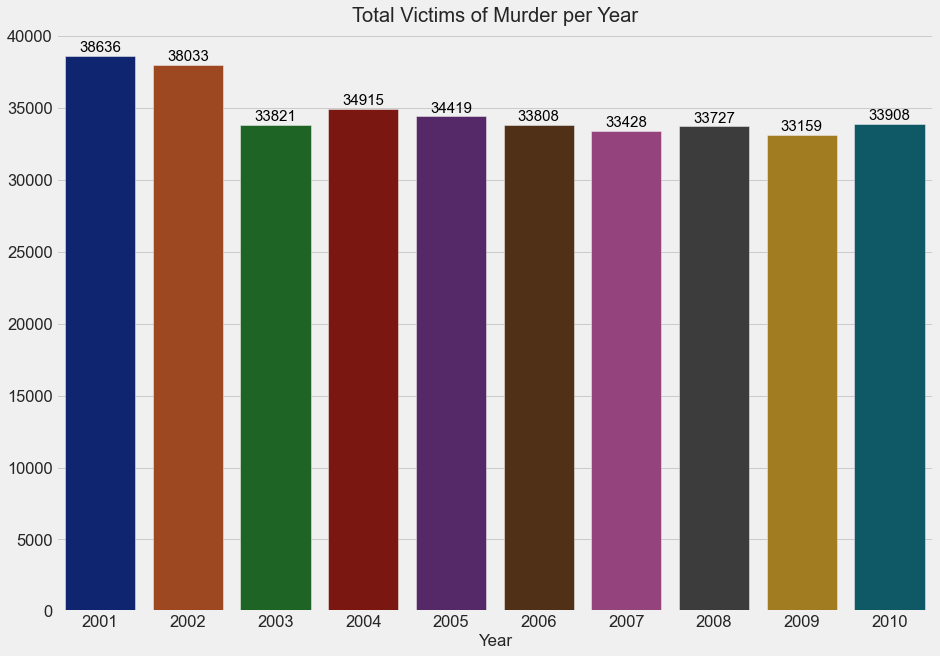

In [49]:


df_total = df[df['Sub_Group_Name']== '3. Total']
df_year = df_total.groupby(['Year'])['Victims_Total'].sum().reset_index() 
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Year' , y = 'Victims_Total' , data = df_year ,palette= 'dark')
plt.title("Total Victims of Murder per Year")
ax.set_ylabel('')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')

**Inference** : 
> We can see that the number of murder crimes is decresing over the years.

Gender of the victims

Text(0, 0.5, '')

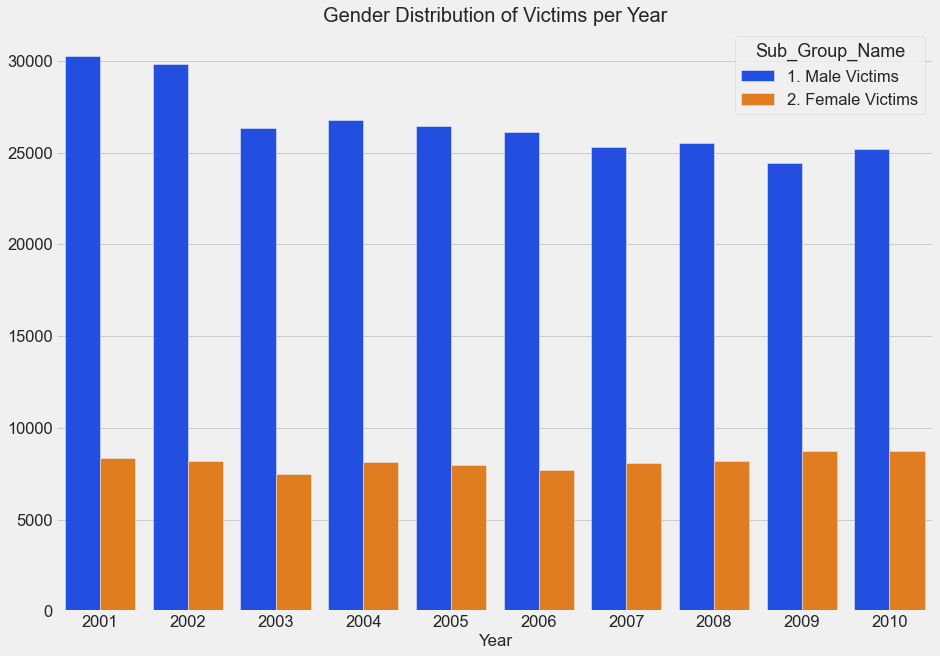

In [50]:
df_gender = df.groupby(['Year' , 'Sub_Group_Name'])['Victims_Total'].sum().reset_index() # grouping with year and sub group
df_gender = df_gender[df_gender['Sub_Group_Name']!= '3. Total']   # we dont need total category of sub group

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot( x = 'Year', y = 'Victims_Total' , hue = 'Sub_Group_Name' , data = df_gender ,palette= 'bright') #plotting barplot
plt.title('Gender Distribution of Victims per Year',size = 20)
ax.set_ylabel('')

**Inference**: 
>Males are more prone to be murder victim as compared to women . 

>Over the years the number of male victims has decreased but the number of female victims is almost same as the throughout years.

**Age of the victim**

Text(0, 0.5, '')

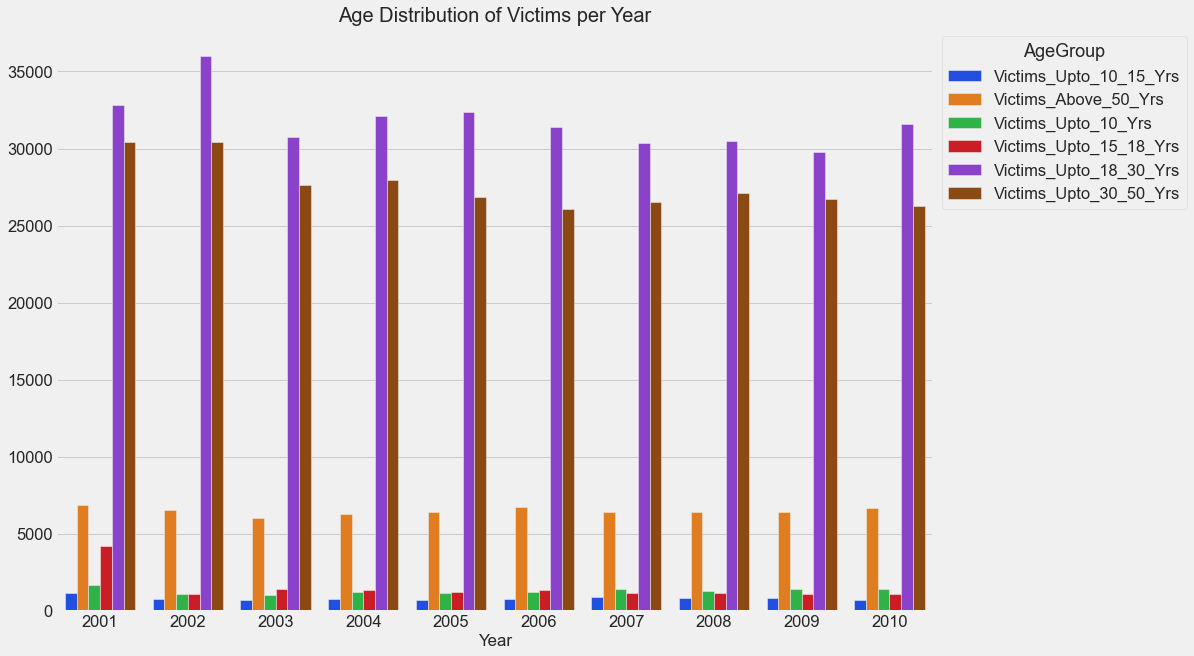

In [51]:
df_age = df.groupby(['Year'])['Victims_Upto_10_15_Yrs','Victims_Above_50_Yrs',
                                   'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
                                   'Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs',].sum().reset_index()  #grouby year and age group
df_age = df_age.melt('Year', var_name='AgeGroup',  value_name='vals') #melting the dataset

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Year' , y = 'vals',hue = 'AgeGroup' ,data = df_age ,palette= 'bright') #plotting a bar
plt.title('Age Distribution of Victims per Year',size = 20)
ax.get_legend().set_bbox_to_anchor((1, 1)) #anchoring the labels so that they dont show up on the graph
ax.set_ylabel('')


**Inference**: 
>Compared to people of other ages the age group 18 - 30 years is more prone to be victim of the murder. 

>Another age group which is most likely to be victim of murder is 30 - 50. 

>Compared to these two groups other age groups are very small in number. 

>From all the groups children are most likely to be safe.

# Age & Gender of the victim

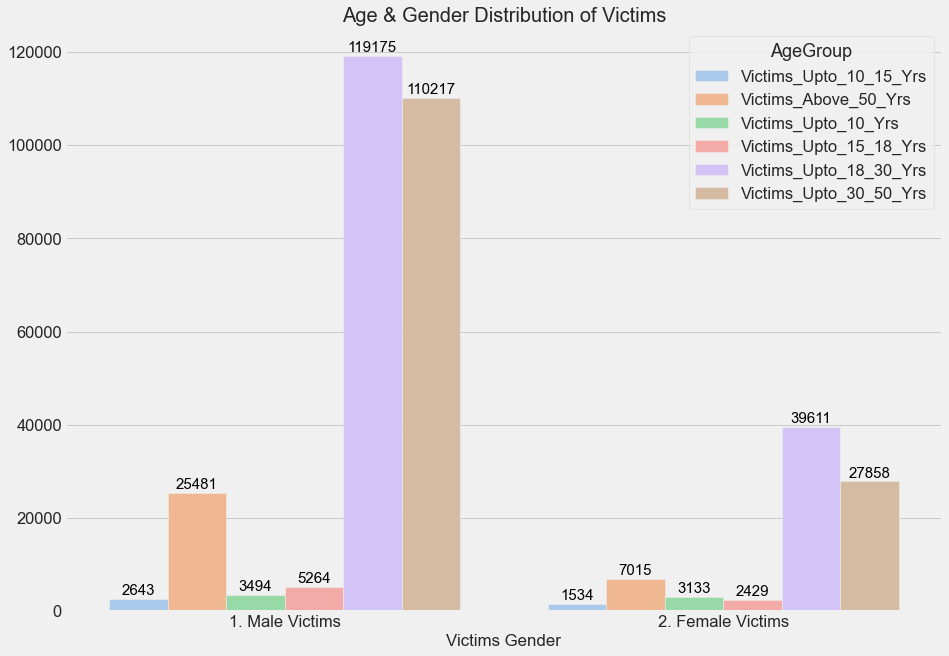

In [52]:
df_murder_age = df.groupby(['Sub_Group_Name'])['Victims_Upto_10_15_Yrs',
                                              'Victims_Above_50_Yrs', 'Victims_Upto_10_Yrs',
                                              'Victims_Upto_15_18_Yrs','Victims_Upto_18_30_Yrs',
                                              'Victims_Upto_30_50_Yrs',].sum().reset_index()     

df_murder_age = df_murder_age.melt('Sub_Group_Name', var_name='AgeGroup',  value_name='vals') 
df_murder_age= df_murder_age[df_murder_age['Sub_Group_Name']!= '3. Total']

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Sub_Group_Name' , y = 'vals',hue = 'AgeGroup' ,data = df_murder_age,palette= 'pastel')
plt.title('Age & Gender Distribution of Victims',size = 20)
ax.get_legend().set_bbox_to_anchor((1, 1)) #using anchor so that legend doesnt show on the graph
ax.set_ylabel('')
ax.set_xlabel('Victims Gender')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')

**Inference**:
>Males of age 18-30 are more likely to be get killed as compared to the any of the age-gender group. 

>After them male of 30-50 are prone to be victim of murder. 

>Similar to male age groups females of age 18-30 are more likely to be get killed . 

# Murders: Statewise

In [53]:
df_statewise_total = df[df['Sub_Group_Name']== '3. Total']   #we need only total number of victims per state
df_statewise_total= df_statewise_total.groupby(['Area_Name'])['Victims_Total'].sum().sort_values(ascending = False).reset_index()
# new_row = {'Area_Name':'Telangana', 'Victims_Total':27481}
print(df_statewise_total)


                    Area_Name  Victims_Total
0               Uttar Pradesh          58810
1                       Bihar          34675
2                 Maharashtra          28693
3              Andhra Pradesh          27481
4              Madhya Pradesh          23694
5                 West Bengal          16959
6                   Karnataka          16891
7                  Tamil Nadu          16876
8                   Jharkhand          15682
9                   Rajasthan          13176
10                      Assam          12761
11                    Gujarat          12757
12                     Odisha          11762
13               Chhattisgarh          10787
14                    Haryana           8793
15                     Punjab           8172
16            Jammu & Kashmir           7339
17                      Delhi           5396
18                     Kerala           4208
19                Uttarakhand           2751
20                    Manipur           2204
21        

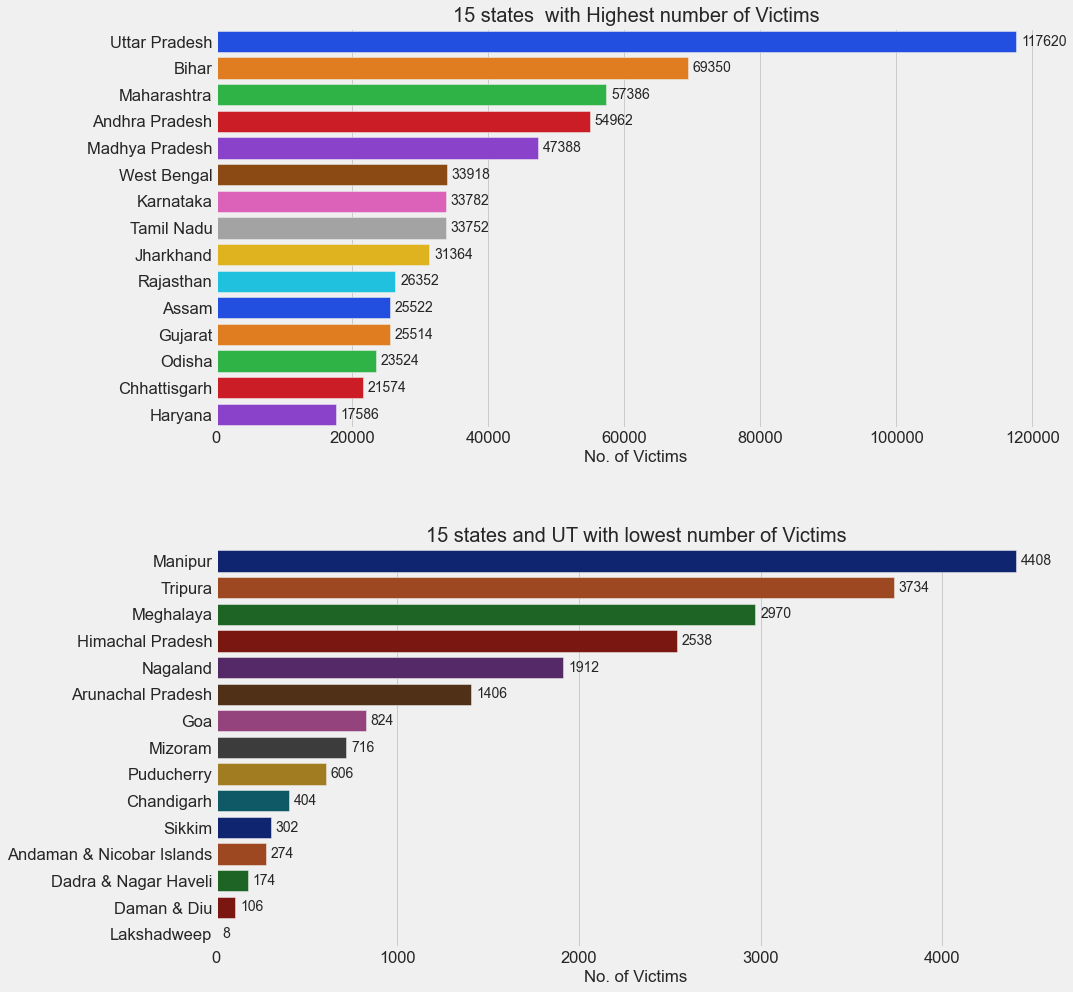

In [54]:
df_state = df[df['Sub_Group_Name']== '3. Total']   #we need only total number of victims per state
df_state= df.groupby(['Area_Name'])['Victims_Total'].sum().sort_values(ascending = False).reset_index()
 
df_state_worst = df_state.head(15) #top highest states
df_state_best = df_state.tail(15) #top lowest states/ut

#sns.set_context("talk")
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

f , axes = plt.subplots(2,1, figsize = (15,14))
ax = sns.barplot(x = 'Victims_Total' , y = 'Area_Name' , data = df_state_worst, ax = axes[0],palette= 'bright') #barplot for highest numbers of victims per state
axes[0].set_title("15 states  with Highest number of Victims", size = 20)
axes[0].set_ylabel('')
axes[0].set_xlabel('No. of Victims')
ax1 = sns.barplot(x = 'Victims_Total' , y = 'Area_Name' , data = df_state_best, ax = axes[1],palette= 'dark' )#barplot for lowest numbers of victims per state
axes[1].set_title("15 states and UT with lowest number of Victims", size = 20)
axes[1].set_ylabel('')
axes[1].set_xlabel('No. of Victims')
plt.tight_layout()  
plt.subplots_adjust(hspace= .3) 
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

for p in ax1.patches:
        ax1.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")


**Inference**: 
>With almost 60000  murders Uttarpradesh has highest victims of murder. 

>Bihar has second highest number of victims which has less than 25000 victims than Uttarpradesh. 

>Uttarpradesh  has the highest population in the country. Bihar has less population than maharashtra still it has higher number of victims than Maharashtra.

>Union Territory Lakshadweep has lowest number of Murder Victims. Factors like population of the state and **Population density** might be responsible for the number of murder victims in the state.

Gender Distribution of victims per state

Text(0.5, 1.0, 'Gender Distribution of Victims per State')

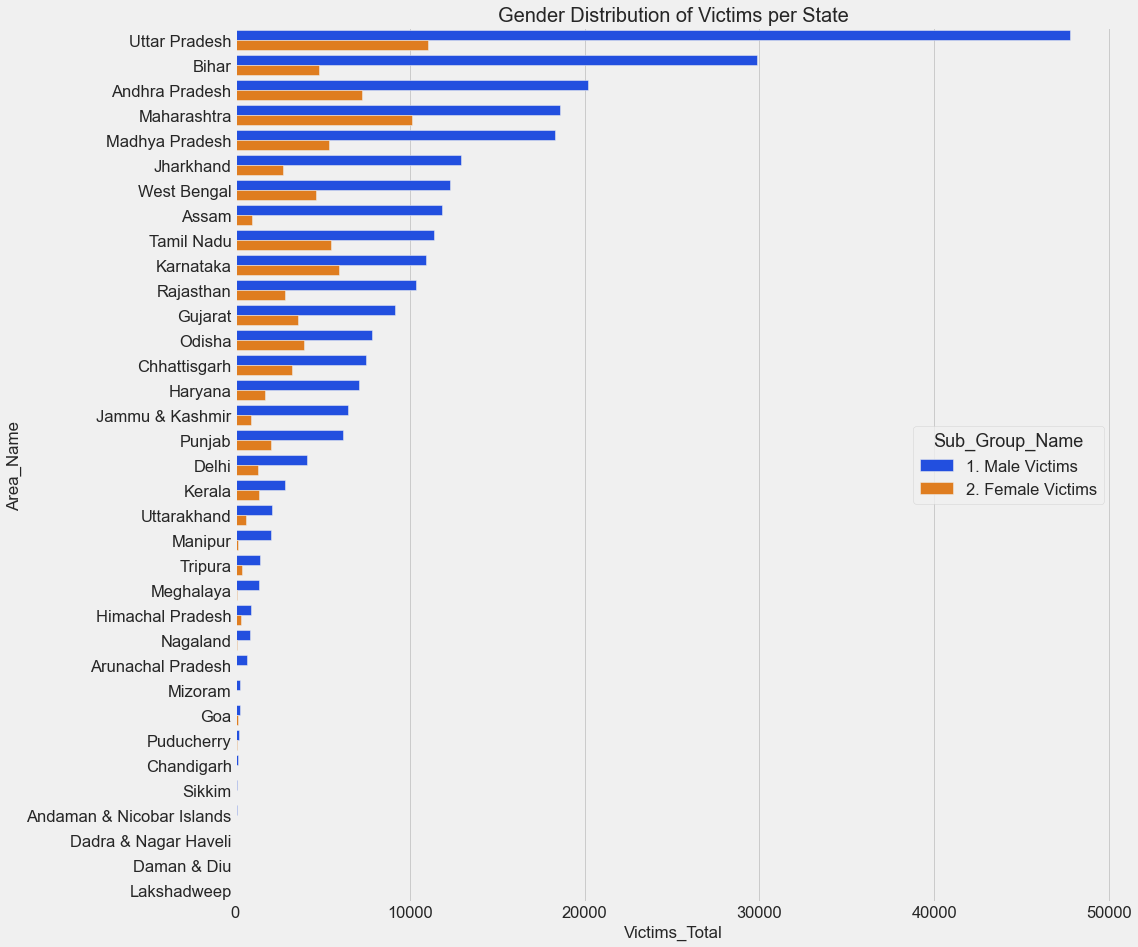

In [55]:
df_state_GS = df.groupby(['Area_Name' , 'Sub_Group_Name'])['Victims_Total'].sum().sort_values(ascending = False).reset_index() #groupby state and gender
df_state_GS = df_state_GS[df_state_GS['Sub_Group_Name']!= '3. Total'] #we dont need total category of gender
plt.figure(figsize = (14,15))
plt.style.use("fivethirtyeight")
sns.barplot( x = 'Victims_Total', y = 'Area_Name' , hue = 'Sub_Group_Name' , data = df_state_GS,palette= 'bright') #barplot
plt.title('Gender Distribution of Victims per State',size = 20)

**Inference** : 

>Males are more likely to be get murdered as compared to females. 

>Mahrashtra has second highest female victims.

#### Statewise Distribution of victims according to their age

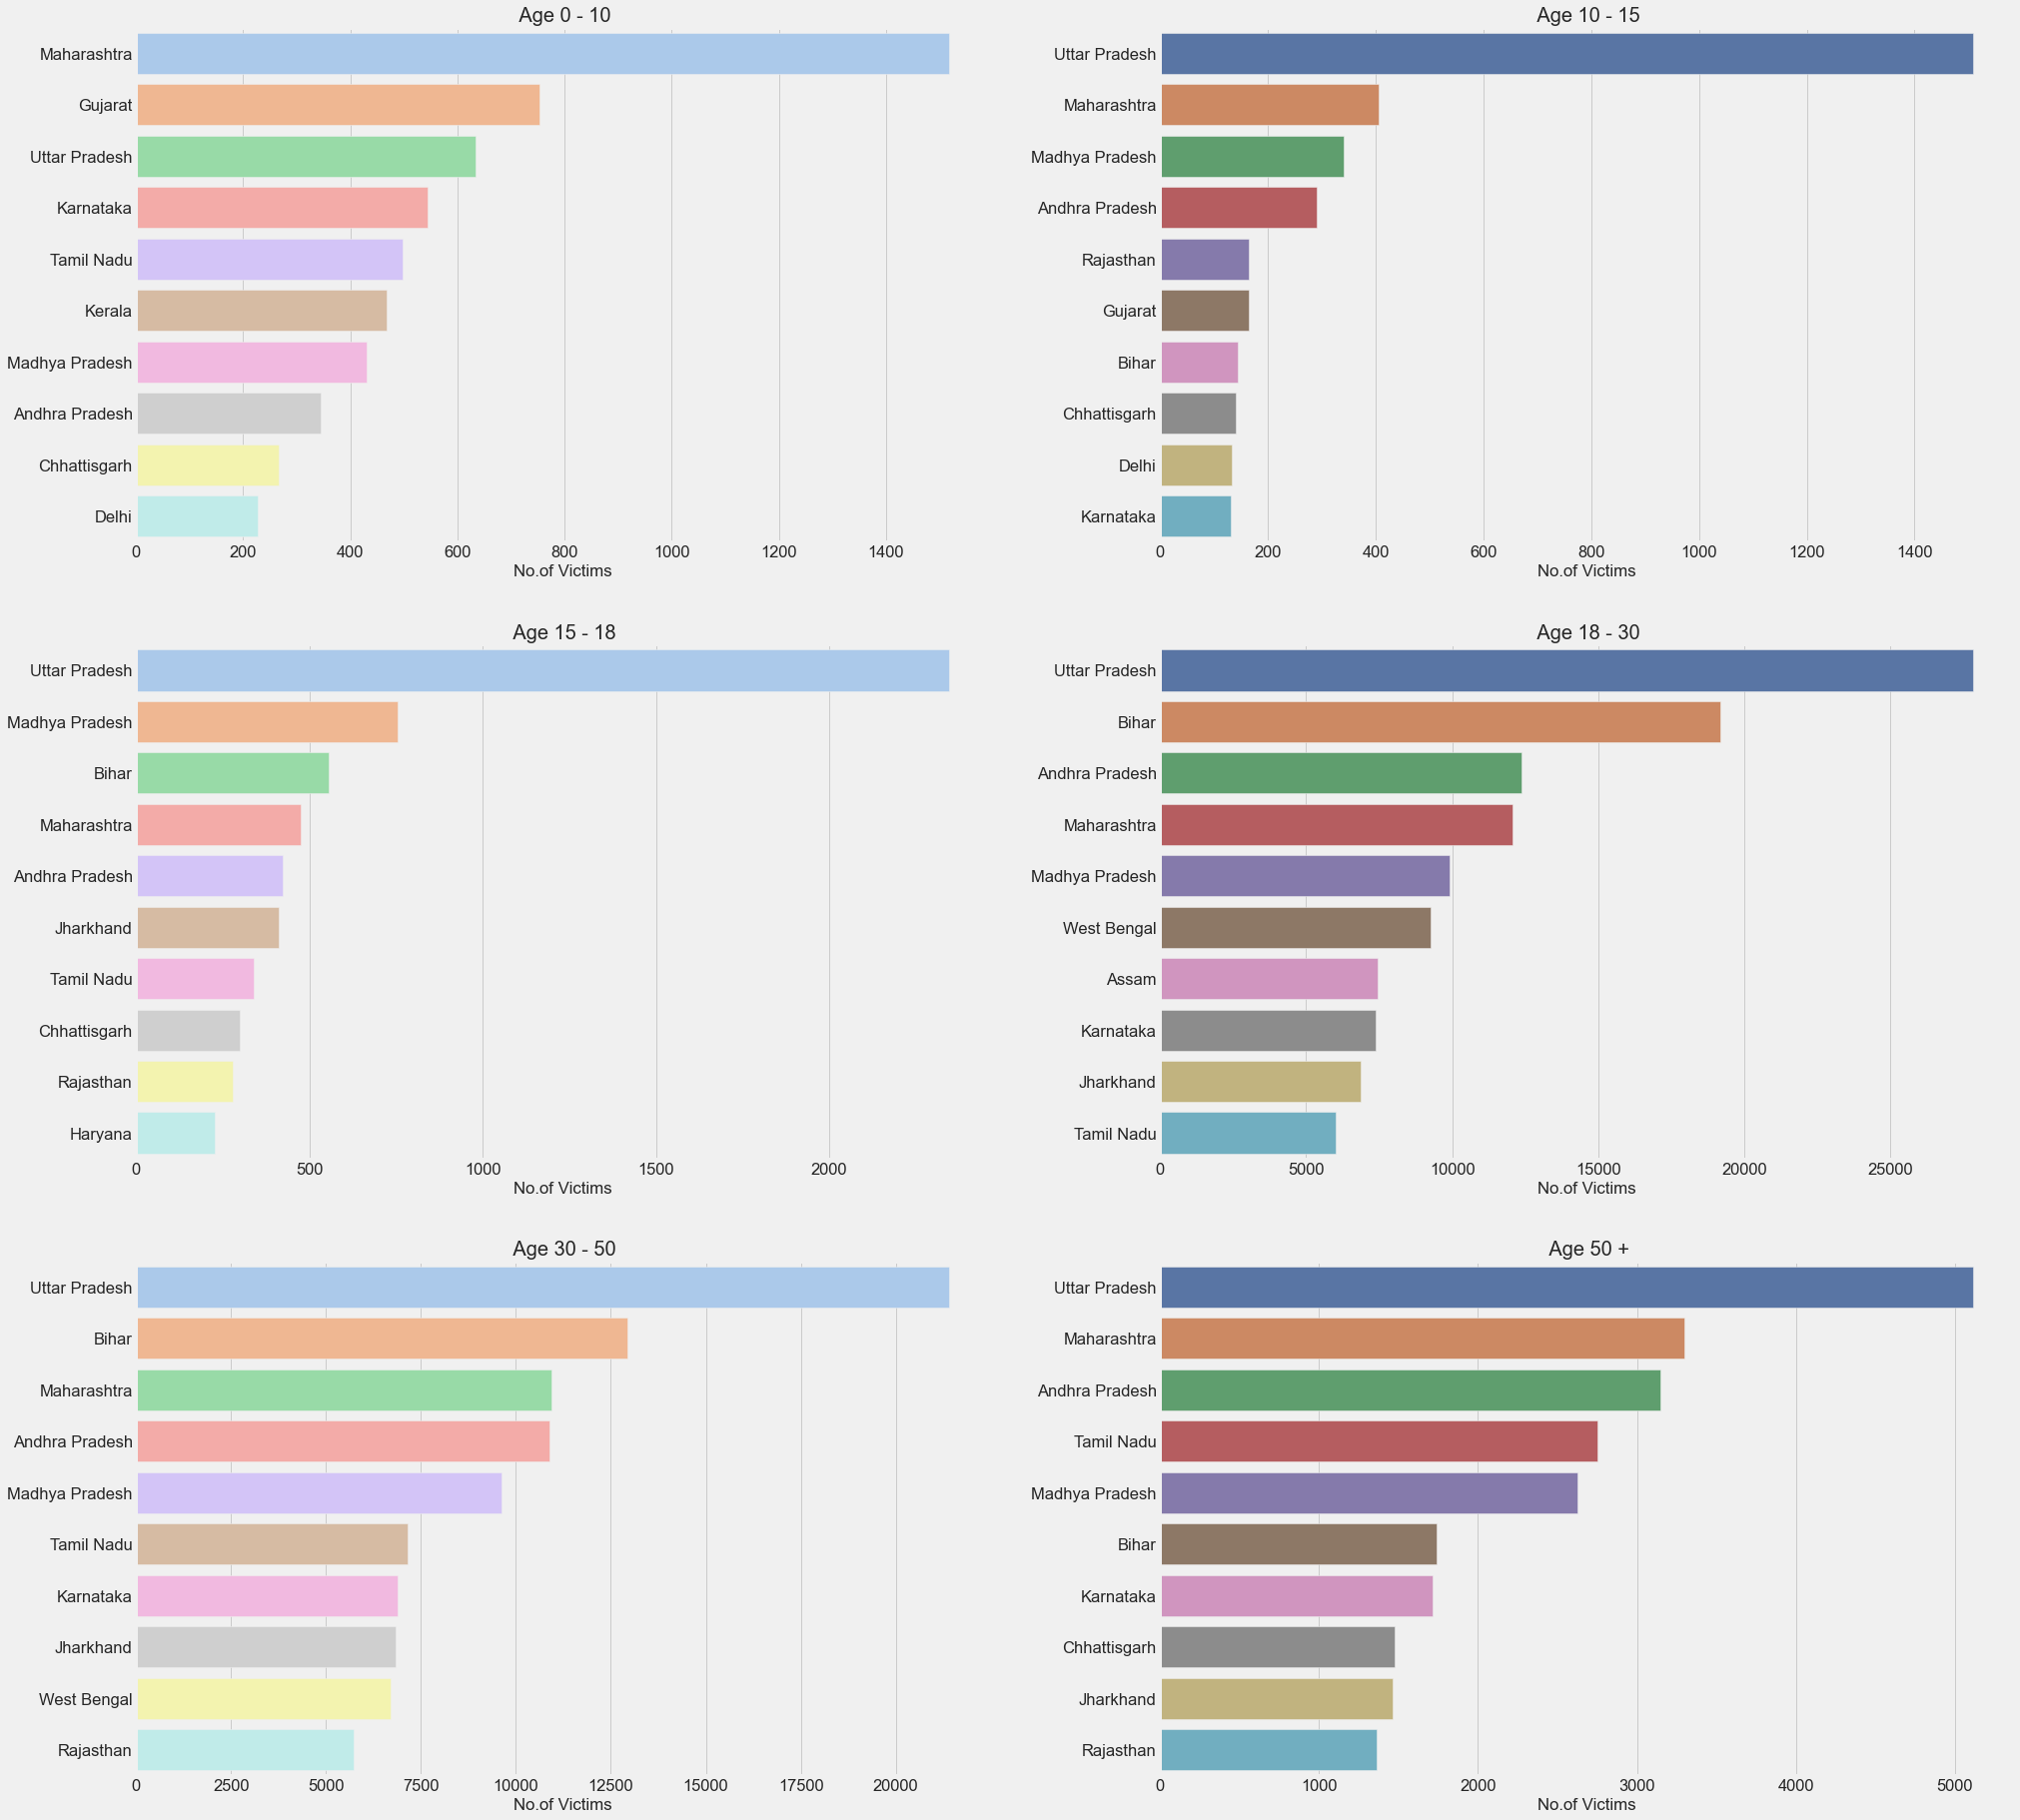

<Figure size 1008x1080 with 0 Axes>

In [59]:
df_NT = df[df['Sub_Group_Name']== '3. Total']
df_SA = df_NT.groupby(['Area_Name'])['Victims_Upto_10_15_Yrs','Victims_Above_50_Yrs', 
                                           'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
                                           'Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs',].sum().reset_index() #grouping with state and age group
df_SA = df_SA.melt('Area_Name', var_name='AgeGroup',  value_name='vals') #melting the dataset

sns.set_style("darkgrid")
sns.set_context("talk")
plt.style.use("fivethirtyeight")


f, axes = plt.subplots(3,2, figsize = (30,30))
plt.figure(figsize = (14,15))
sns.barplot(x = 'vals', y = 'Area_Name', data = df_SA[df_SA['AgeGroup']== 'Victims_Upto_10_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[0,0],palette= 'pastel')
axes[0,0].set_title(' Age 0 - 10', size = 20)
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('No.of Victims')

sns.barplot(x = 'vals', y = 'Area_Name', data = df_SA[df_SA['AgeGroup']== 'Victims_Upto_10_15_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[0,1],palette= 'deep' )
axes[0,1].set_title(' Age 10 - 15', size = 20)
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('No.of Victims')    


sns.barplot(x = 'vals', y = 'Area_Name', data = df_SA[df_SA['AgeGroup']== 'Victims_Upto_15_18_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[1,0],palette= 'pastel')
axes[1,0].set_title(' Age 15 - 18', size = 20)
axes[1,0].set_ylabel('')
axes[1,0].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = df_SA[df_SA['AgeGroup']== 'Victims_Upto_18_30_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[1,1],palette= 'deep' )
axes[1,1].set_title(' Age 18 - 30', size = 20)
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = df_SA[df_SA['AgeGroup']== 'Victims_Upto_30_50_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[2,0],palette= 'pastel')
axes[2,0].set_title(' Age 30 - 50', size = 20)
axes[2,0].set_ylabel('')
axes[2,0].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = df_SA[df_SA['AgeGroup']== 'Victims_Above_50_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[2,1],palette= 'deep')
axes[2,1].set_title(' Age 50 +', size = 20)
axes[2,1].set_ylabel('')
axes[2,1].set_xlabel('No.of Victims')  
plt.tight_layout()
#plt.subplots_adjust(hspace= .0001)

**Inference** : 
>Uttarpradesh has the highest number of murder victims in all age group except age group 0 - 10

>Maharashtra has the highest child victims

>Gujrat ranks second in case of child victims. Assam is the only north eastern state which comes under these graphs. 

# **Conclusion**

Although country's murder rate is decreasing gradually over the years. 

State like Uttarpradesh , Bihar , Mahrashtra , West Bengal has the high number of victims over the years. 

The male age group of 18-30 is most unsafe. 

Whereas, Females upto 10 years are safest